<a href="https://colab.research.google.com/github/URK-KIPLiIS/Python-Data/blob/main/Descriptive_Statistics_Cars(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import math
import string
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [3]:
# import dataset
url="https://raw.githubusercontent.com/URK-KIPLiIS/Python-Data/main/CARS.csv"
df = pd.read_csv(url)
df.sample(4)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
259,Mercedes-Benz,C320 4dr,Sedan,Europe,All,"$38,830","$36,162",3.2,6.0,215,19,27,3450,107,178
94,Chrysler,300M 4dr,Sedan,USA,Front,"$29,865","$27,797",3.5,6.0,250,18,27,3581,113,198
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
241,Mazda,Mazda3 i 4dr,Sedan,Asia,Front,"$15,500","$14,525",2.0,4.0,148,26,34,2696,104,178


<h1>Data Cleaning</h1>

In [4]:
# check for null values
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [5]:
# shape of dataset
df.shape

(428, 15)

In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
# column list
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [8]:
# dataset styling function
def color_negative_red(value):        
    if math.isnan(value) :
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color

In [9]:
# print nan values
df[df.Cylinders.isna()].style.applymap(color_negative_red, subset=["Cylinders"])

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.300000,nan,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.300000,nan,238,18,24,3029,106,174


In [10]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [11]:
# dataset description
df.describe(include="all")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,G35 4dr,Sedan,Asia,Front,"$33,995","$19,638",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


In [12]:
# unique value in Cylinders feature
df.Cylinders.nunique()

7

In [13]:
# Cylinders value counts
df.Cylinders.value_counts()

6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64

In [14]:
# since all value are int, better fillna with median instead of mean
df.Cylinders.fillna(df.Cylinders.median(), inplace=True)

In [15]:
# check after fillna operation
df.iloc[247:249]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,6.0,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,6.0,238,18,24,3029,106,174


In [16]:
# print unique values in each columns, to identify categerical data
for item in df.columns.to_list():
    print(f"{item}: {df[item].nunique()}")

Make: 38
Model: 425
Type: 6
Origin: 3
DriveTrain: 3
MSRP: 410
Invoice: 425
EngineSize: 43
Cylinders: 7
Horsepower: 110
MPG_City: 28
MPG_Highway: 33
Weight: 348
Wheelbase: 40
Length: 67


In [17]:
# Type of cars percentage wise distribution
df.Type.value_counts(normalize=True).round(2)*100

Sedan     61.0
SUV       14.0
Sports    11.0
Wagon      7.0
Truck      6.0
Hybrid     1.0
Name: Type, dtype: float64

In [18]:
# print 3 random rows
df.sample(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
347,Saturn,lon3 4dr,Sedan,USA,Front,"$15,825","$14,811",2.2,4.0,140,26,35,2692,103,185
42,BMW,M3 convertible 2dr,Sports,Europe,Rear,"$56,595","$51,815",3.2,6.0,333,16,23,3781,108,177
371,Suzuki,Verona LX 4dr,Sedan,Asia,Front,"$17,262","$17,053",2.5,6.0,155,20,27,3380,106,188


In [19]:
# observation, MSRP & Invoice feature are of object type, though they comes under numerical value consideration, also contains $ , string characters
# remove string special characters
# convert those columns into float
df.MSRP = df.MSRP.apply(lambda x: x.replace("$","").replace(",","")).astype("float")
df.Invoice = df.Invoice.apply(lambda x: x.replace("$","").replace(",","")).astype("float")

In [20]:
# check data type conversion
df.MSRP.dtype,df.Invoice.dtype

(dtype('float64'), dtype('float64'))

In [21]:
# check MSRP & Invoice columns conversion
df.sample(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
139,Ford,Focus ZTW,Wagon,USA,Front,17475.0,16375.0,2.0,4.0,130,26,33,2702,103,178
245,Mazda,MX-5 Miata convertible 2dr,Sports,Asia,Rear,22388.0,20701.0,1.8,4.0,142,23,28,2387,89,156
153,Honda,Element LX,SUV,Asia,All,18690.0,17334.0,2.4,4.0,160,21,24,3468,101,167


<h1>Data Visualization</h1>

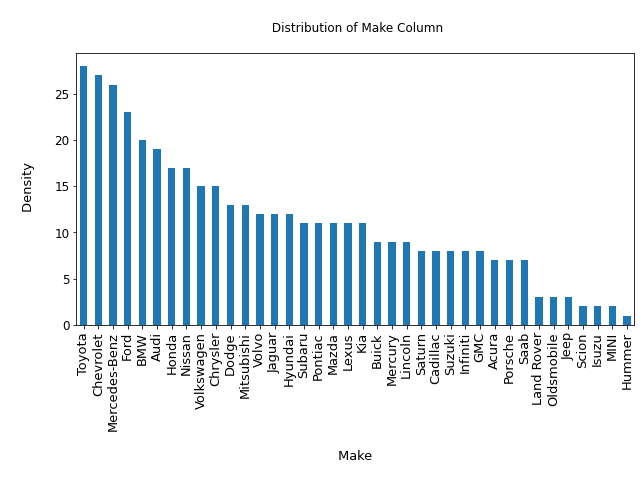

In [22]:
# bar chart vusualization of car manufacturer make feature
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Make Column\n', color='black')
plt.xlabel('\n Make \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13,)
plt.yticks(fontsize=12)
df.Make.value_counts().plot(kind="bar")

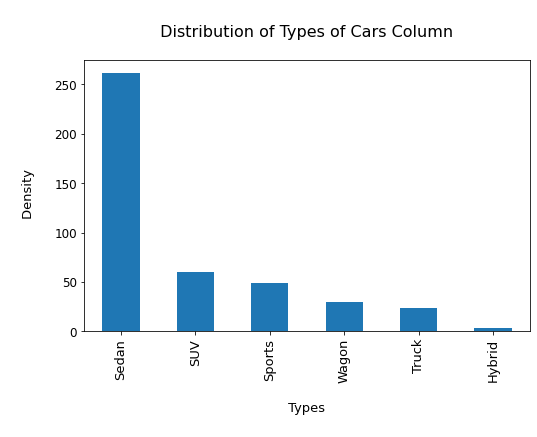

In [23]:
# bar chart vusualization of car type feature
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Types of Cars Column \n', size=16, color='black')
plt.xlabel('\n Types \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
df.Type.value_counts().plot(kind="bar")
plt.show()

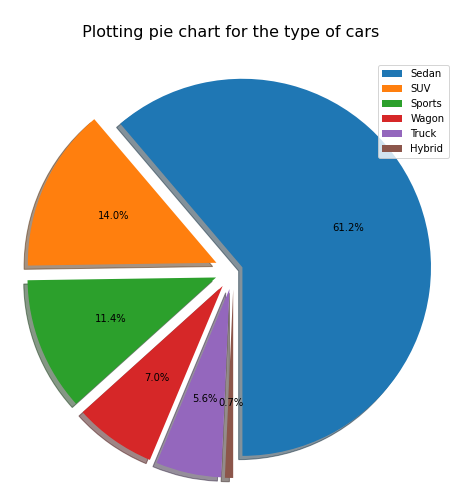

In [24]:
# pie chart vusualization of car type feature
plt.figure(figsize=(8,8))
labels= [x for x in df.Type.value_counts().sort_values(ascending=False).index] 
my_explode = [0.05 if ind == 0 else 0.1 for ind, x in enumerate(df.Type.value_counts())]
patches,ax, text= plt.pie(df.Type.value_counts().sort_values(ascending=False),autopct='%1.1f%%',shadow=True,startangle=270, explode=my_explode)
plt.title('\n Plotting pie chart for the type of cars \n', size=16, color='black')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

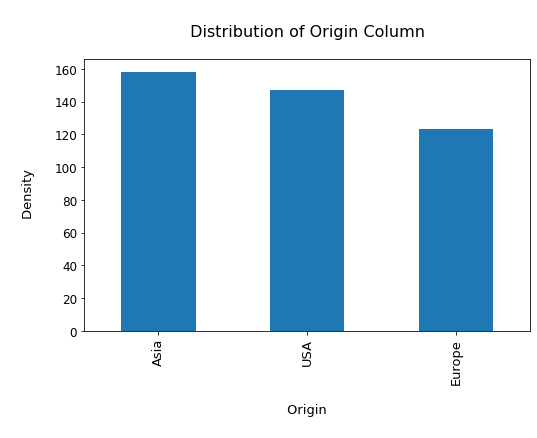

In [25]:
# bar chart vusualization of Origin feature
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Origin Column \n', size=16, color='black')
plt.xlabel('\n Origin \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
df.Origin.value_counts().plot(kind="bar")
plt.show()

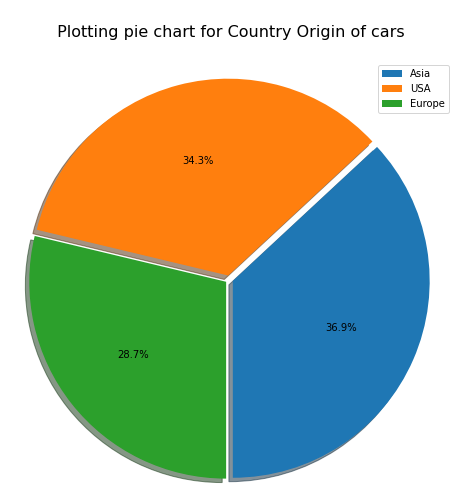

In [26]:
# pie chart vusualization of Origin feature
plt.figure(figsize=(8,8))
labels= [x for x in df.Origin.value_counts().sort_values(ascending=False).index] 
my_explode = [0.02 for ind, x in enumerate(df.Origin.value_counts())]
patches,ax, text= plt.pie(df.Origin.value_counts().sort_values(ascending=False),autopct='%1.1f%%',shadow=True,startangle=270, explode=my_explode)
plt.title('\n Plotting pie chart for Country Origin of cars \n', size=16, color='black')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

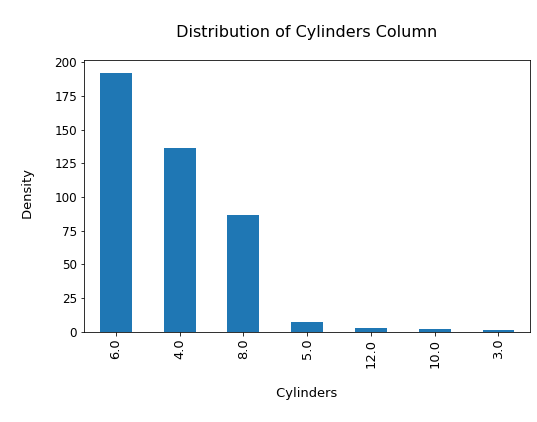

In [27]:
# bar chart vusualization of Cylinders feature
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Cylinders Column \n', size=16, color='black')
plt.xlabel('\n Cylinders \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
df.Cylinders.value_counts().plot(kind="bar")
plt.show()

In [28]:
# print random 3 rows
df.sample(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
104,Chrysler,Pacifica,Wagon,USA,Rear,31230.0,28725.0,3.5,6.0,250,17,23,4675,116,199
163,Honda,Odyssey LX,Sedan,Asia,Front,24950.0,22498.0,3.5,6.0,240,18,25,4310,118,201
262,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600.0,5.5,12.0,493,13,19,4473,114,196


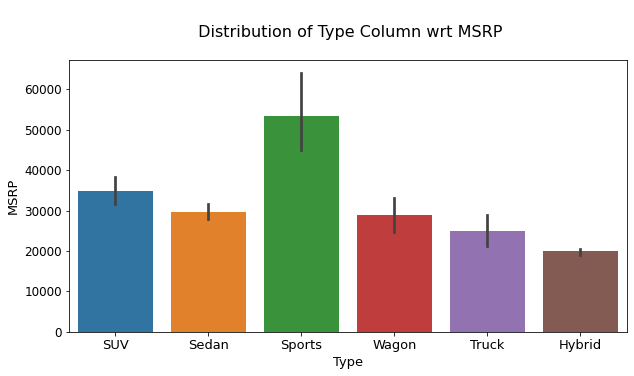

In [29]:
# bar plot visualization of type feature wrt MSRP
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Type Column wrt MSRP\n', size=16, color='black')
plt.xlabel('\n Types \n', fontsize=13, color='black')
plt.ylabel('\n MSRP\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.barplot(x=df.Type, y=df.MSRP,data=df)

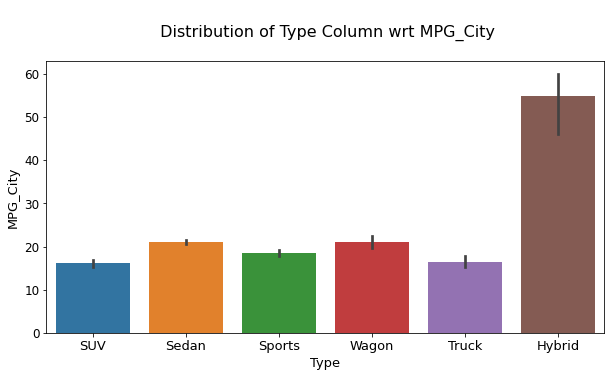

In [30]:
# bar plot visualization of type feature wrt MPG_City
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Type Column wrt MPG_City\n', size=16, color='black')
plt.xlabel('\n Types \n', fontsize=13, color='black')
plt.ylabel('\n MPG_City\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.barplot(x=df.Type, y=df.MPG_City)

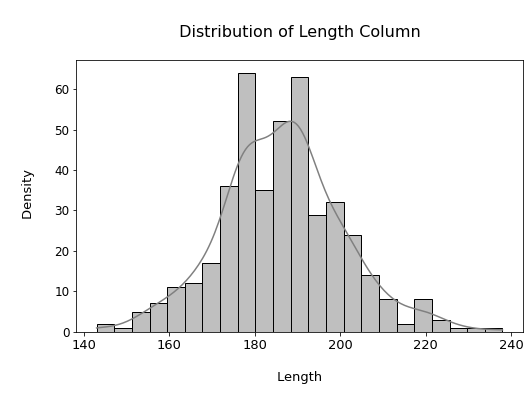

In [31]:
# histogram visualization of length feature
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Length Column \n', size=16, color='black')
plt.xlabel('\n Length \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.Length,kde=True,color="grey")
plt.show()

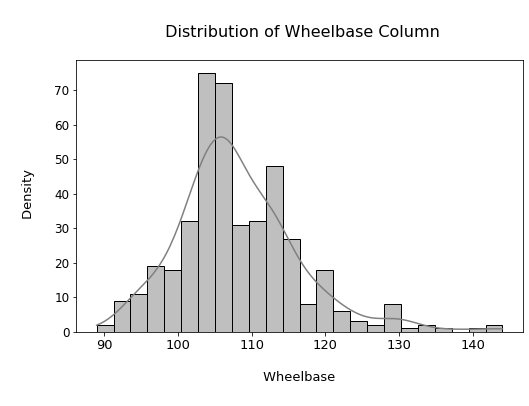

In [32]:
# histogram visualization of Wheelbase feature
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Wheelbase Column\n', size=16, color='black')
plt.xlabel('\n Wheelbase \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.Wheelbase,kde=True,color="grey")
plt.show()

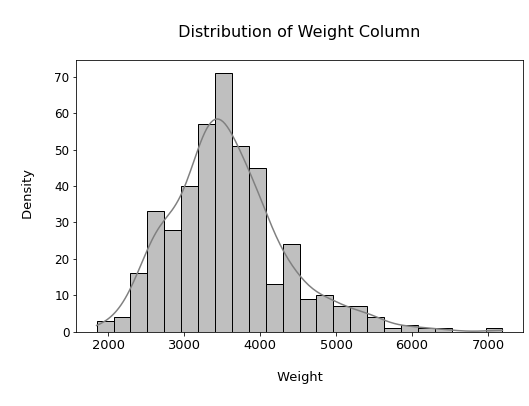

In [33]:
# histogram visualization of Weight feature
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Weight Column \n', size=16, color='black')
plt.xlabel('\n Weight \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.Weight,kde=True,color="grey")
plt.show()

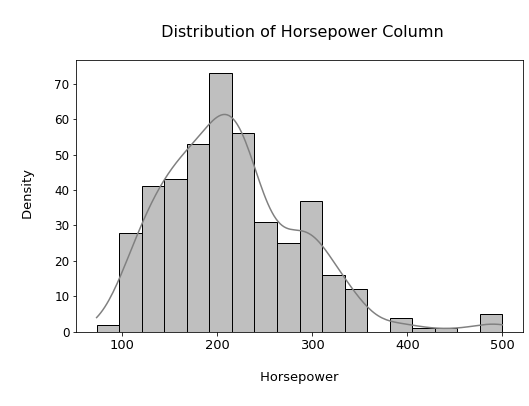

In [34]:
# histogram visualization of Horsepower feature
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Horsepower Column\n', size=16, color='black')
plt.xlabel('\n Horsepower \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(x=df.Horsepower,kde=True,color="grey")
plt.show()

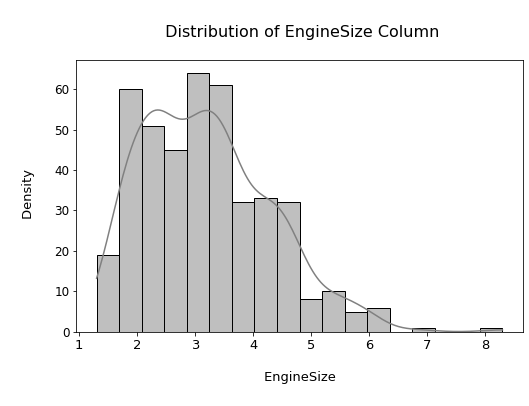

In [35]:
# histogram visualization of EngineSize feature
plt.figure(figsize=(8,5))
plt.title('\n Distribution of EngineSize Column\n', size=16, color='black')
plt.xlabel('\n EngineSize \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.EngineSize,kde=True,color="grey")
plt.show()

In [36]:
# print random 3 rows
df.sample(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
392,Toyota,Avalon XLS 4dr,Sedan,Asia,Front,30920.0,27271.0,3.0,6.0,210,21,29,3439,107,192
127,Ford,Taurus LX 4dr,Sedan,USA,Front,20320.0,18881.0,3.0,6.0,155,20,27,3306,109,198
215,Land Rover,Range Rover HSE,SUV,Europe,All,72250.0,65807.0,4.4,8.0,282,12,16,5379,113,195


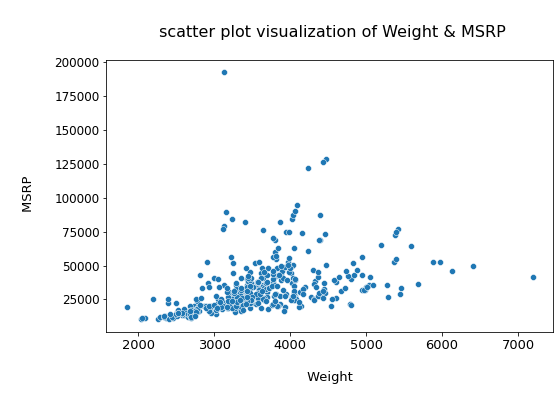

In [37]:
# scatter plot visualization of Weight & MSRP
plt.figure(figsize=(8,5))
plt.title('\n scatter plot visualization of Weight & MSRP\n', size=16, color='black')
plt.xlabel('\n Weight \n', fontsize=13, color='black')
plt.ylabel('\n MSRP\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.scatterplot(x=df.Weight,y=df.MSRP,data=df)

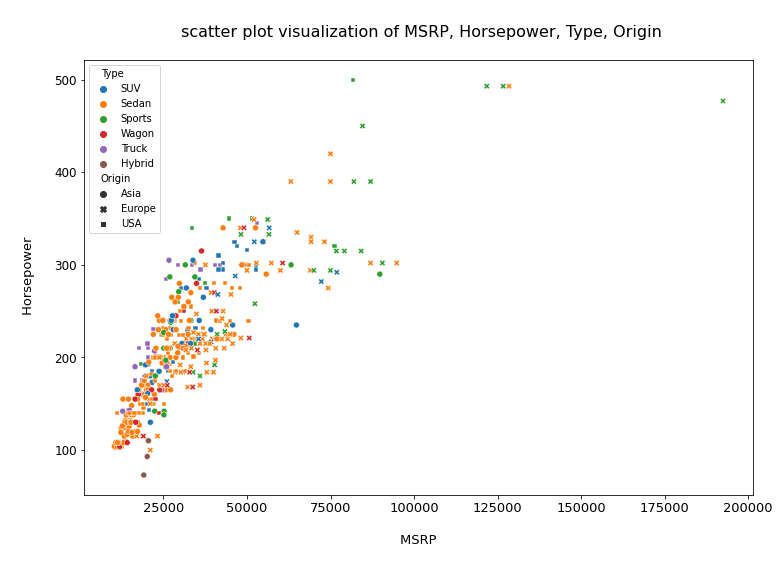

In [38]:
# scatter plot visualization of MSRP, Horsepower, Type, Origin
plt.figure(figsize=(12,8))
plt.title('\n scatter plot visualization of MSRP, Horsepower, Type, Origin\n', size=16, color='black')
plt.xlabel('\n MSRP \n', fontsize=13, color='black')
plt.ylabel('\n Horsepower\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.scatterplot(x=df.MSRP,y=df.Horsepower,hue=df.Type,style=df.Origin,data=df)

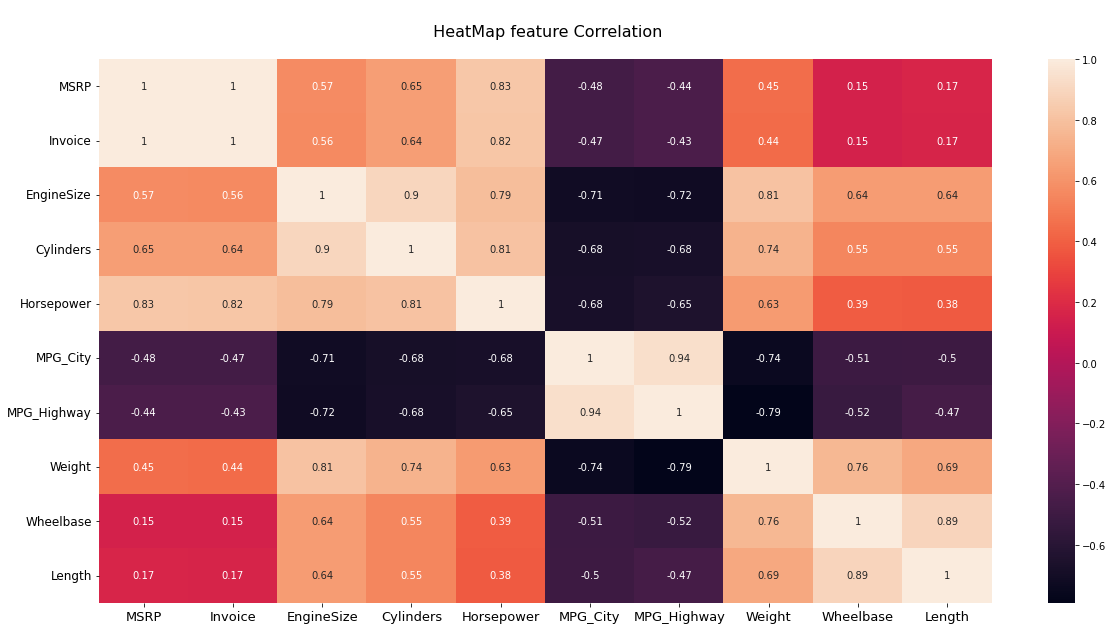

In [39]:
# feature correlation visualization
fig, ax = plt.subplots(figsize=(20,10)) 
plt.title('\n HeatMap feature Correlation\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.heatmap(df.corr(),annot=True)

In [40]:
# observation
# 1. strong correlation between Invoice & MSRP
# 2. strong correlation between MPG_Highway & MPG_City
# 3. strong correlation between EngineSize & Cylinders
# 4. strong correlation between Length & Wheelbase
df.drop(columns=["Invoice","MPG_Highway","EngineSize","Length"], inplace=True)

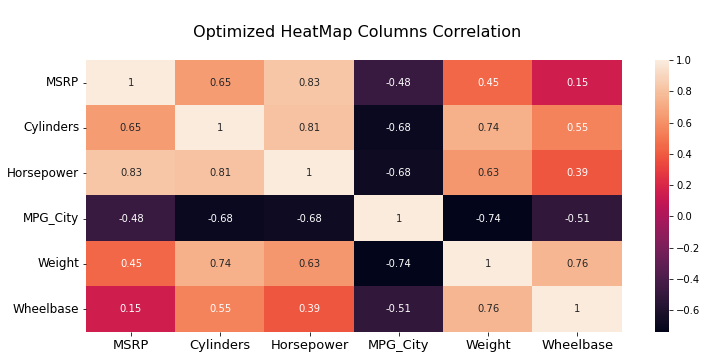

In [41]:
# check heatmap corr graph, after removing strong correlation columns
fig, ax = plt.subplots(figsize=(12,5))
plt.title('\n Optimized HeatMap Columns Correlation\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.heatmap(df.corr(),annot=True)

In [42]:
# print random 3 rows
df.sample(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Cylinders,Horsepower,MPG_City,Weight,Wheelbase
89,Chevrolet,Malibu Maxx LS,Wagon,USA,Front,22225.0,6.0,200,22,3458,112
83,Chevrolet,Corvette convertible 2dr,Sports,USA,Rear,51535.0,8.0,350,18,3248,105
391,Toyota,Camry Solara SLE V6 2dr,Sedan,Asia,Front,26510.0,6.0,225,20,3439,107


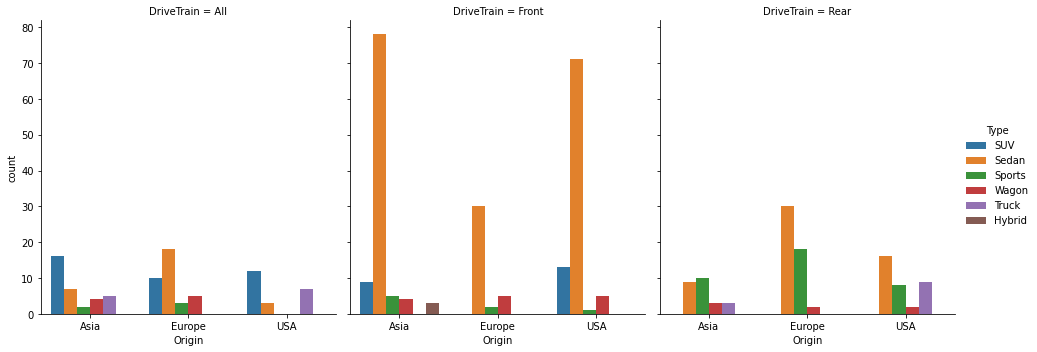

In [43]:
# catplot-count graph visualization of Origin, Type, DriveTrain
sns.catplot(x="Origin", hue="Type", col="DriveTrain",
                data=df, kind="count",
                height=5, aspect=.9);

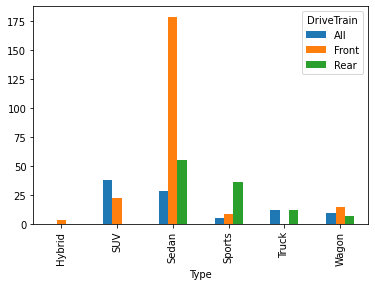

In [44]:
# Group by Type, DriveTrain feature visualization
pd.crosstab(df['Type'],df['DriveTrain']).plot.bar()

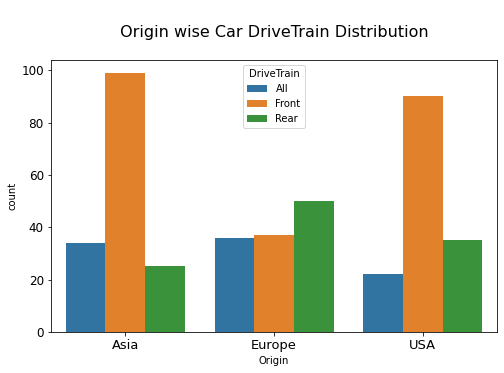

In [45]:
# Countplot group by Origin, DriveTrain visualization
plt.figure(figsize=(8,5))
plt.title('\n Origin wise Car DriveTrain Distribution \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.countplot(x=df.Origin,hue=df.DriveTrain)

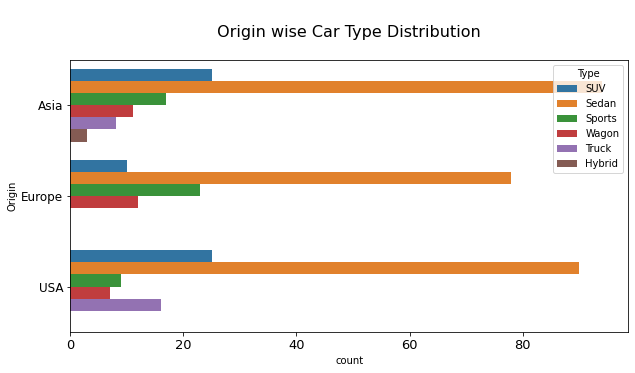

In [46]:
# Countplot group by Origin, Type visualization on y axis
fig, ax = plt.subplots(figsize=(10,5)) 
plt.title('\n Origin wise Car Type Distribution \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.countplot(data=df,y='Origin',hue='Type')

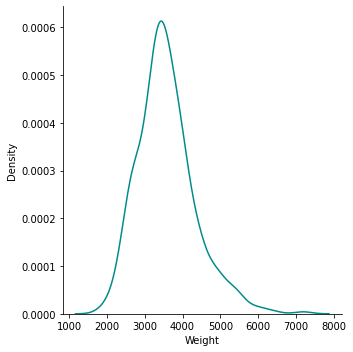

In [47]:
# Weight displot visualization
sns.displot(df.Weight,color="darkcyan", kind="kde")

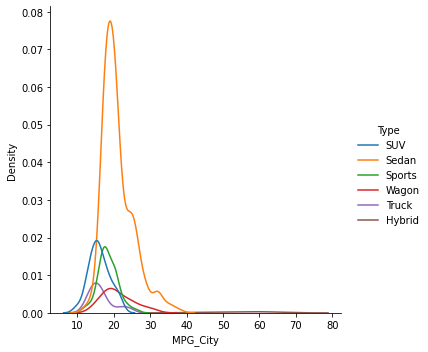

In [48]:
# MPG_City, Type displot visualization
sns.displot(x=df.MPG_City,hue=df.Type, kind="kde")

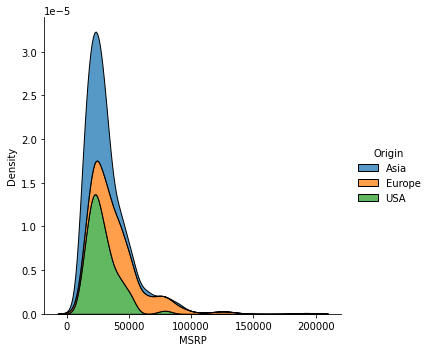

In [49]:
# MSRP, Origin displot visualization
sns.displot(x=df.MSRP,hue=df.Origin, kind="kde",multiple="stack")

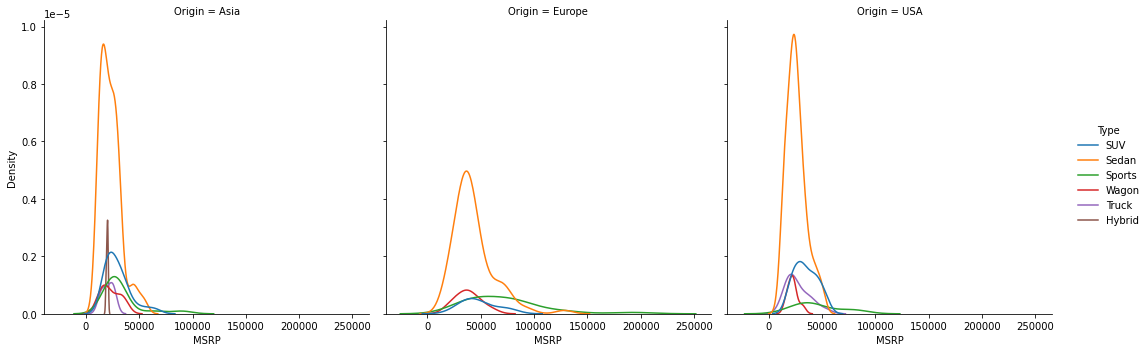

In [50]:
# MSRP, Type, Origin displot visualization
sns.displot(data=df, x="MSRP", hue="Type", col="Origin", kind="kde")

In [51]:
# print 3 random rows
df.sample(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Cylinders,Horsepower,MPG_City,Weight,Wheelbase
410,Volkswagen,Passat W8 4MOTION 4dr,Sedan,Europe,Front,39235.0,8.0,270,18,3953,106
0,Acura,MDX,SUV,Asia,All,36945.0,6.0,265,17,4451,106
415,Volkswagen,Passat W8,Wagon,Europe,Front,40235.0,8.0,270,18,4067,106


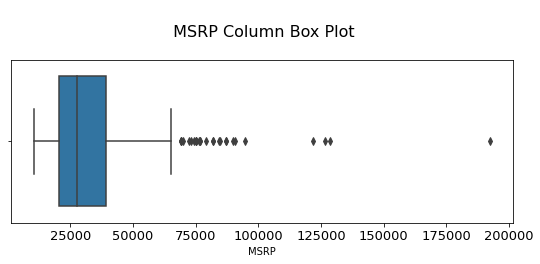

In [52]:
# MSRP boxplot visualization, mainly used for feature outlier detection
plt.figure(figsize=(9,3))
plt.title('\n MSRP Column Box Plot\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.boxplot(x=df.MSRP)
plt.show()

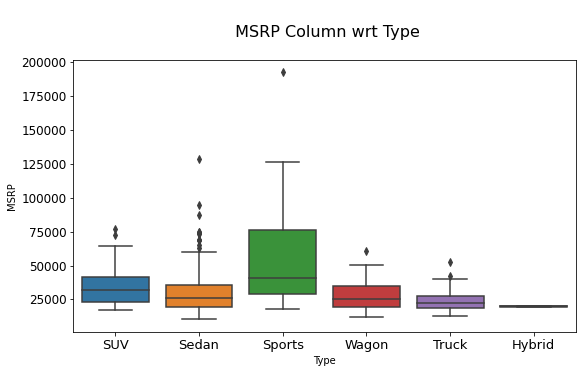

In [53]:
# MSRP,Type boxplot visualization
plt.figure(figsize=(9,5))
plt.title('\n MSRP Column wrt Type\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.boxplot(x="Type", y="MSRP", data=df)

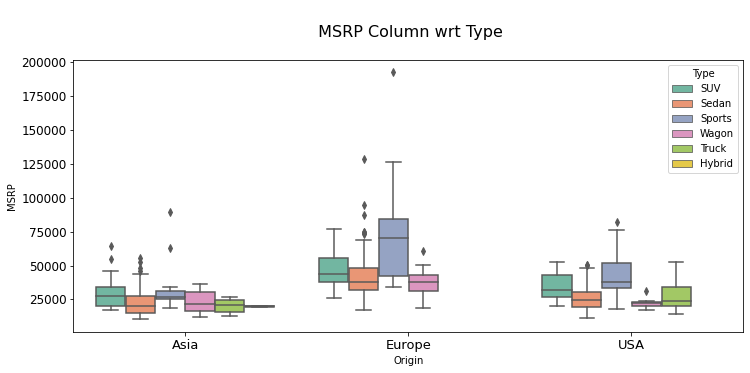

In [54]:
# Origin,MSRP,Type boxplot visualization
plt.figure(figsize=(12,5))
plt.title('\n MSRP Column wrt Type\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.boxplot(x="Origin", y="MSRP", hue="Type",data=df, palette="Set2")

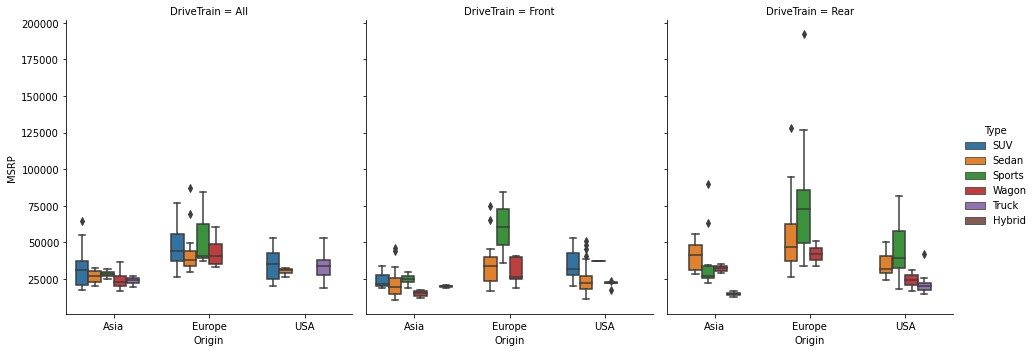

In [55]:
# catplot-box graph visualization of Origin, MSRP, Type
sns.catplot(x="Origin", y="MSRP",
                hue="Type", col="DriveTrain",
                data=df, kind="box",
                height=5, aspect=.9);

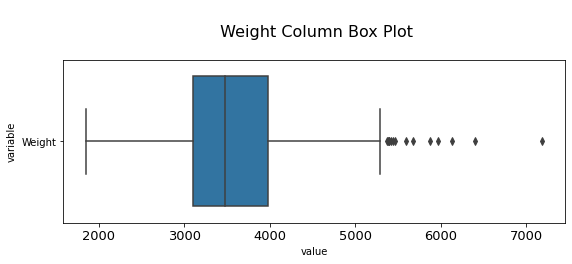

In [56]:
# weight colums box plot visualization
plt.figure(figsize=(9,3))
sns.boxplot(x="value", y="variable", data=pd.melt(df[["Weight"]]))
plt.title('\n Weight Column Box Plot\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.show()

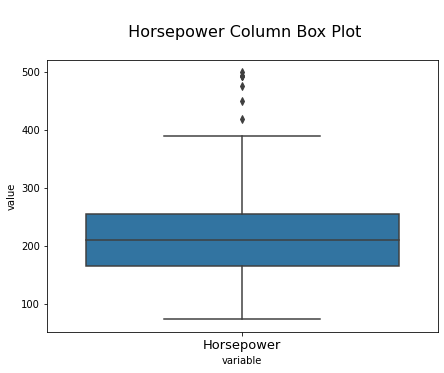

In [57]:
# Horsepower colums box plot visualization
plt.figure(figsize=(7,5))
sns.boxplot(x="variable", y="value", data=pd.melt(df[["Horsepower"]]))
plt.title('\n Horsepower Column Box Plot\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.show()

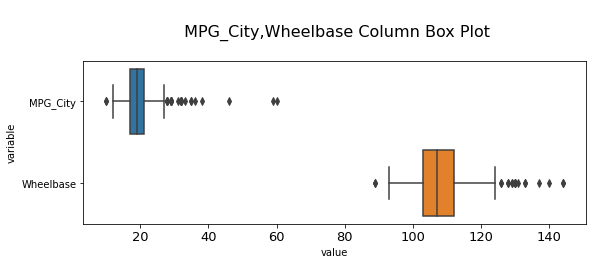

In [58]:
# MPG_City,Wheelbase colums box plot visualization
plt.figure(figsize=(9,3))
sns.boxplot(x="value", y="variable", data=pd.melt(df[["MPG_City","Wheelbase"]]))
plt.title('\n MPG_City,Wheelbase Column Box Plot\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.show()

In [59]:
# print random 3 rows
df.sample(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Cylinders,Horsepower,MPG_City,Weight,Wheelbase
71,Chevrolet,Cavalier LS 2dr,Sedan,USA,Front,16385.0,4.0,140,26,2617,104
352,Scion,xA 4dr hatch,Sedan,Asia,Front,12965.0,4.0,108,32,2340,93
265,Mercedes-Benz,E320 4dr,Sedan,Europe,Rear,48170.0,6.0,221,19,3635,112
227,Lexus,SC 430 convertible 2dr,Sports,Asia,Rear,63200.0,8.0,300,18,3840,103
233,Lincoln,LS V8 Sport 4dr,Sedan,USA,Rear,40095.0,8.0,280,17,3768,115


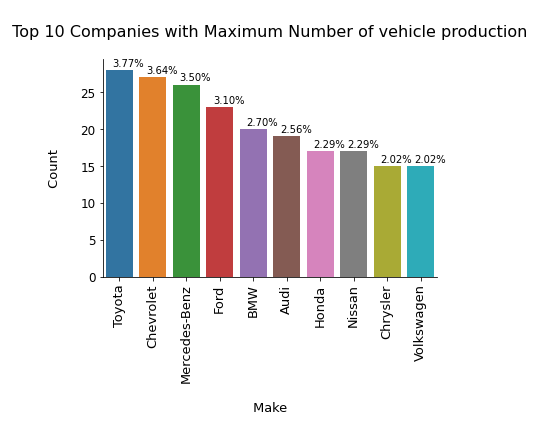

In [60]:
# Viualizing the above information

from IPython.core.pylabtools import figsize
#Lets visualize the top 10 companies 

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= df["Make"].value_counts().sort_values(ascending=False).head(10).index ,y= df["Make"].value_counts().sort_values(ascending=False).head(10))

#Removing top and Right borders
sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["Make"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x() + 0.2, p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/742)*100))

#Beautifying the plot
plt.title('\n Top 10 Companies with Maximum Number of vehicle production \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Make \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

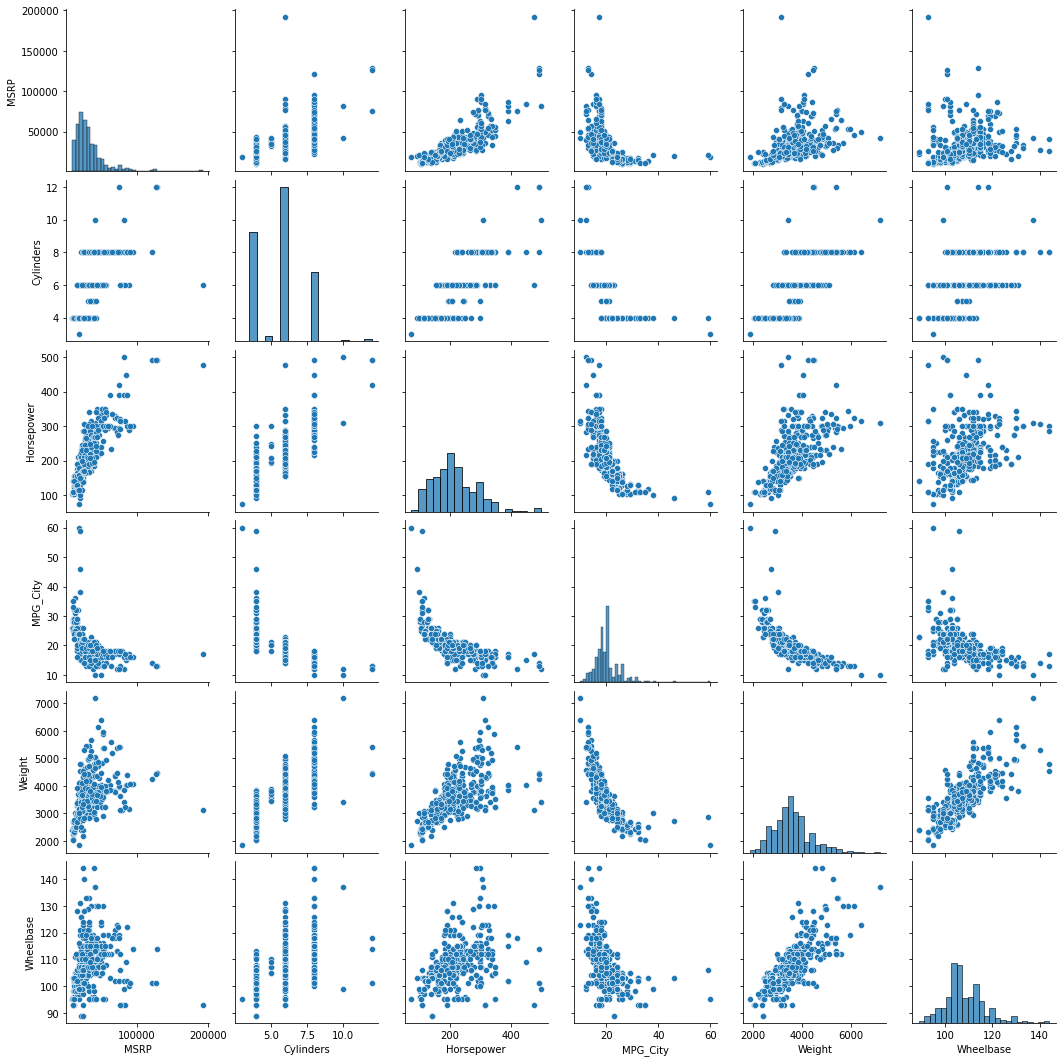

In [61]:
sns.pairplot(df)

In [62]:
# Plot the make of the car and its location
fig = px.histogram(df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

In [63]:
# Plot the make of the car and type
fig = px.histogram(df, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs TYPE")
                  
fig.show()

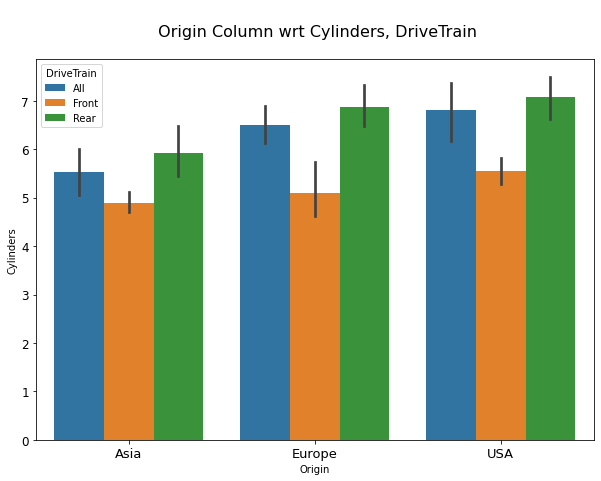

In [64]:
plt.figure(figsize=(10,7))
plt.title('\n Origin Column wrt Cylinders, DriveTrain\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.barplot(x="Origin", y="Cylinders",hue="DriveTrain", data=df)

In [65]:
pd.get_dummies(df, drop_first=True)

,MSRP,Cylinders,Horsepower,MPG_City,Weight,Wheelbase,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,...,Model_xB,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Europe,Origin_USA,DriveTrain_Front,DriveTrain_Rear
0,36945.0,6.0,265,17,4451,106,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,23820.0,4.0,200,24,2778,101,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,26990.0,4.0,200,22,3230,105,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,33195.0,6.0,270,20,3575,108,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,43755.0,6.0,225,18,3880,115,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565.0,5.0,197,21,3450,105,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
424,42565.0,5.0,242,20,3450,105,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
425,45210.0,6.0,268,19,3653,110,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
426,26135.0,4.0,170,22,2822,101,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [66]:
df[df.Make == "Acura"].Origin.unique()

array(['Asia'], dtype=object)

<b>References</b>

[Reference1](https://www.kaggle.com/code/nikhilbhathi/100-insights-data-science-jobs-eda)

[Reference2](https://www.kaggle.com/code/satyajitn/predicating-the-offer-pricing)

[Dataframe Styling](https://mode.com/example-gallery/python_dataframe_styling/)



